# Tailoring Movie Through Smart AI and Contextual Recommendation Algorithms

### Import necessary libraries 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rapidfuzz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.simplefilter(action='ignore')

### Load Dataset

In [5]:
df=pd.read_csv(r"C:\Users\Deepa sri\OneDrive\Desktop\movie recommendation\movies.csv")
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


### Data cleaning and visualization

In [6]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [7]:
max_val=df['budget'].max()
max_val

np.int64(380000000)

In [8]:
df['scaled_budget']=df['budget'].apply(lambda x: x/max_val)

In [9]:
df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count,scaled_budget
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,0.076434
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,0.107164
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,0.002079
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,0.039474
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,0.105263
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,1.000000


In [10]:
use_cols=['genres','scaled_budget','keywords','title','cast','director','overview']

In [11]:
df1=df[use_cols]

In [12]:
df1.isnull().sum()

genres            28
scaled_budget      0
keywords         412
title              0
cast              43
director          30
overview           3
dtype: int64

In [13]:
df1.head()

,genres,scaled_budget,keywords,title,cast,director,overview
0,Action Adventure Fantasy Science Fiction,0.623684,culture clash future space war space colony so...,Avatar,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,"In the 22nd century, a paraplegic Marine is di..."
1,Adventure Fantasy Action,0.789474,ocean drug abuse exotic island east india trad...,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha..."
2,Action Adventure Crime,0.644737,spy based on novel secret agent sequel mi6,Spectre,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,A cryptic message from Bond’s past sends him o...
3,Action Crime Drama Thriller,0.657895,dc comics crime fighter terrorist secret ident...,The Dark Knight Rises,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,Following the death of District Attorney Harve...
4,Action Adventure Science Fiction,0.684211,based on novel mars medallion space travel pri...,John Carter,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,"John Carter is a war-weary, former military ca..."


In [14]:
df1.fillna(' ',inplace=True)

In [15]:
combined_feature=df1['scaled_budget'].astype('str')+' '+df1['genres']+' '+df1['keywords']+' '+df1['title']+' '+df1['director']+' '+df1['overview']+' '+df1['cast']

In [16]:
combined_feature

0       0.6236842105263158 Action Adventure Fantasy Sc...
1       0.7894736842105263 Adventure Fantasy Action oc...
2       0.6447368421052632 Action Adventure Crime spy ...
3       0.6578947368421053 Action Crime Drama Thriller...
4       0.6842105263157895 Action Adventure Science Fi...
                              ...                        
4798    0.0005789473684210527 Action Crime Thriller un...
4799    2.368421052631579e-05 Comedy Romance   Newlywe...
4800    0.0 Comedy Drama Romance TV Movie date love at...
4801    0.0     Shanghai Calling Daniel Hsia When ambi...
4802    0.0 Documentary obsession camcorder crush drea...
Length: 4803, dtype: object

In [17]:
df1[df1['scaled_budget']==0.0]

,genres,scaled_budget,keywords,title,cast,director,overview
265,Comedy Fantasy Family,0.0,cat brother sister relationship boredom chaos ...,The Cat in the Hat,Mike Myers Dakota Fanning Spencer Breslin Kell...,Bo Welch,Conrad and Sally Walden are home alone with th...
321,Comedy,0.0,politics politician election campaign \u00a0no...,The Campaign,Will Ferrell Zach Galifianakis Dylan McDermott...,Jay Roach,Two rival politicians compete to win an electi...
359,Adventure Animation Comedy Family,0.0,chipmunk cgi talking animal aftercreditsstinge...,Alvin and the Chipmunks: The Road Chip,Jason Lee Justin Long Bella Thorne Matthew Gra...,Walt Becker,"Through a series of misunderstandings, Alvin, ..."
406,Drama Animation Family Comedy,0.0,holiday santa claus duringcreditsstinger woman...,Arthur Christmas,James McAvoy Hugh Laurie Bill Nighy Jim Broadb...,Barry Cook,"Each Christmas, Santa and his vast army of hig..."
409,Drama Music,0.0,show business film making tap dancing movie in...,All That Jazz,Roy Scheider Jessica Lange Leland Palmer Ann R...,Bob Fosse,Bob Fosse's semi-autobiographical film celebra...
...,...,...,...,...,...,...,...
4795,Drama,0.0,gang audition police fake homeless actress,Bang,Darling Narita Peter Greene Michael Newland Er...,Ash Baron-Cohen,A young woman in L.A. is having a bad day: she...
4797,Foreign Thriller,0.0,,Cavite,,Neill Dela Llana,"Adam, a security guard, travels from Californi..."
4800,Comedy Drama Romance TV Movie,0.0,date love at first sight narration investigati...,"Signed, Sealed, Delivered",Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith,"""Signed, Sealed, Delivered"" introduces a dedic..."
4801,,0.0,,Shanghai Calling,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,Daniel Hsia,When ambitious New York attorney Sam is sent t...


In [18]:
df.genres.value_counts()

genres
Drama                                       370
Comedy                                      282
Drama Romance                               164
Comedy Romance                              144
Comedy Drama                                142
                                           ... 
Comedy Fantasy Thriller                       1
Animation Drama Family                        1
Comedy Romance Science Fiction Drama          1
Horror Drama Thriller Crime                   1
Fantasy Animation Science Fiction Family      1
Name: count, Length: 1168, dtype: int64

In [19]:
df1[df1['scaled_budget']==0.0].shape 

#Remove scaled_budget because of huge variation 

(1037, 7)

In [20]:
combined_feature=df1['genres']+' '+df1['keywords']+' '+df1['title']+' '+df1['director']+' '+df1['overview']+' '+df1['cast']

In [21]:
combined_feature

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance   Newlyweds Edward Burns A newl...
4800    Comedy Drama Romance TV Movie date love at fir...
4801        Shanghai Calling Daniel Hsia When ambitiou...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object

In [22]:
combined_feature[0]

'Action Adventure Fantasy Science Fiction culture clash future space war space colony society Avatar James Cameron In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez'

## Text Visualization

In [23]:
from wordcloud import WordCloud

In [24]:
text=' '.join(combined_feature)

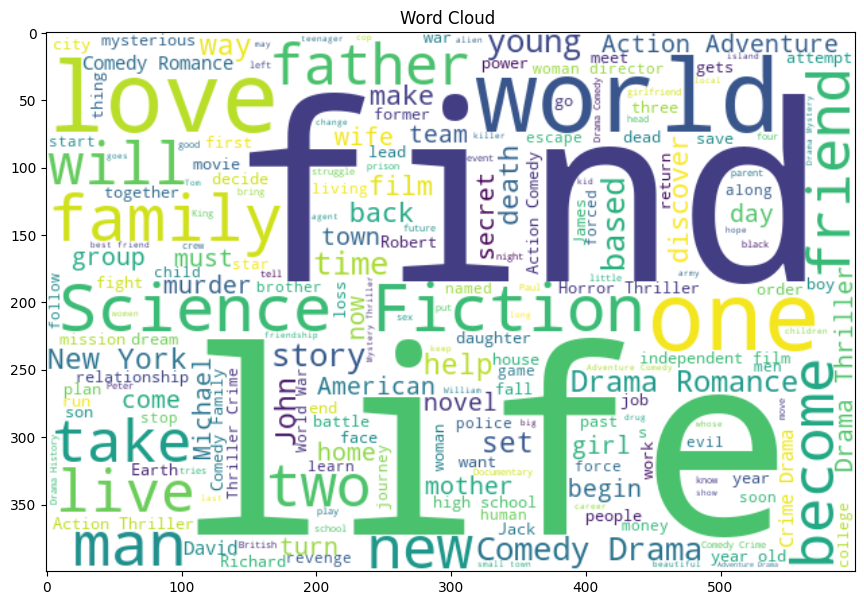

In [25]:
wordcloud=WordCloud(width=600,height=400,background_color='white').generate(text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title(f'Word Cloud ')
plt.show()

## Text Vectorization

In [26]:
vectorizer=TfidfVectorizer()
feature_extraction=vectorizer.fit_transform(combined_feature)

In [27]:
print(feature_extraction)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 293473 stored elements and shape (4803, 30910)>
  Coords	Values
  (0, 544)	0.06262916472109609
  (0, 686)	0.07221286353532679
  (0, 9832)	0.08931611890592941
  (0, 24224)	0.08330928141650655
  (0, 10104)	0.08350175723531805
  (0, 6668)	0.1571298361548511
  (0, 5338)	0.1624020235760397
  (0, 10895)	0.12151641624543087
  (0, 25679)	0.2570658237436695
  (0, 29782)	0.09118908500959987
  (0, 5654)	0.18160450812401374
  (0, 25495)	0.1405614837151579
  (0, 2077)	0.21257111254685807
  (0, 14328)	0.08825325268740974
  (0, 4333)	0.13852380927252836
  (0, 13613)	0.039263340975708105
  (0, 27404)	0.058284033463945985
  (0, 227)	0.20670849956468493
  (0, 4820)	0.13136067420445788
  (0, 20314)	0.20191839597668043
  (0, 17196)	0.15017561320932138
  (0, 14171)	0.04711612544171151
  (0, 7892)	0.1884975603043995
  (0, 27696)	0.03322556321702097
  (0, 18439)	0.15207568178382858
  :	:
  (4802, 9248)	0.07432395443209878
  (4802, 24353)	0.0826338

In [28]:
movie_name=input("Enter the movie_name:")
similar_movies=difflib.get_close_matches(movie_name,list(df.title),n=3)


: 

: 

In [ ]:
movie_index=df1.index[df1.title==similar_movies[0]]
movie_index.tolist()

NameError: name 'df1' is not defined

## Cosine Similarity

In [ ]:
similarity=cosine_similarity(feature_extraction)
len(similarity)


4803

In [ ]:
similarity_score=list(enumerate(similarity[movie_index[0]]))
similarity_score[0:9]

[(0, 1.0),
 (1, 0.03330113121811146),
 (2, 0.03100455879489204),
 (3, 0.031289371034825576),
 (4, 0.07617507130196044),
 (5, 0.05164737593355014),
 (6, 0.01607170090990939),
 (7, 0.062114666919639426),
 (8, 0.020662640954680074)]

In [ ]:
sorted_score=sorted(similarity_score,key=lambda x:x[1],reverse=True)
sorted_score[0:9]

[(0, 1.0),
 (1914, 0.16066063846566153),
 (461, 0.15435260416602975),
 (56, 0.14976212443415304),
 (1352, 0.14864119364513492),
 (1531, 0.14843292113325568),
 (94, 0.14733554848118408),
 (3158, 0.1472835647052912),
 (2403, 0.14571660223784694)]

In [ ]:
a=int(input("Enter the movie_count you want for recommendation :" ))
print(f"The recommendation for {a} is listed")
for i in sorted_score[0:a]:
      display(df1.iloc[i[0],3])


Enter the movie_count you want for recommendation : 10


The recommendation for 10 is listed


'Avatar'

'Lifeforce'

'Lost in Space'

'Star Trek Beyond'

'Gattaca'

'Moonraker'

'Guardians of the Galaxy'

'Alien'

'Aliens'

'Zathura: A Space Adventure'

### Output

In [ ]:
movie_name=input("Enter the movie_name:")
a=int(input("Enter the movie_count you want for recommendation :" ))
similar_movies=difflib.get_close_matches(movie_name,list(df.title),n=3)
movie_index=df1.index[df1.title==similar_movies[0]]
movie_index.tolist()
similarity=cosine_similarity(feature_extraction)
similarity_score=list(enumerate(similarity[movie_index[0]]))
sorted_score=sorted(similarity_score,key=lambda x:x[1],reverse=True)
print(f"The recommendation for {a} similar movies is listed")
for i in sorted_score[0:a]:
      display(df1.iloc[i[0],3])

Enter the movie_name: avenger
Enter the movie_count you want for recommendation : 10


The recommendation for 10 similar movies is listed


'The Avengers'

'Avengers: Age of Ultron'

'Captain America: The Winter Soldier'

'Captain America: Civil War'

'Iron Man 2'

'X-Men'

'The Incredible Hulk'

'Thor: The Dark World'

'X-Men: Apocalypse'

'Captain America: The First Avenger'

In [ ]:
import streamlit as st
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

st.set_page_config(page_title="Smart Movie Recommender", layout="centered")
st.title("🎬 Smart Movie Recommendation Engine")
st.write("This app recommends movies based on genres, cast, keywords, and more!")

# File uploader
uploaded_file = st.file_uploader("📂 Upload your movies.csv file", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)

    # Selecting required columns
    try:
        use_cols = ['genres', 'keywords', 'title', 'cast', 'director', 'overview']
        df1 = df[use_cols].fillna("")

        # Combine selected features
        combined_feature = (
            df1['genres'] + " " +
            df1['keywords'] + " " +
            df1['title'] + " " +
            df1['director'] + " " +
            df1['overview'] + " " +
            df1['cast']
        )

        # Vectorization
        vectorizer = TfidfVectorizer()
        feature_matrix = vectorizer.fit_transform(combined_feature)
        similarity = cosine_similarity(feature_matrix)

        movie_list = df1['title'].tolist()
        selected_movie = st.selectbox("🎥 Select a movie you like:", movie_list)

        if selected_movie:
            match = difflib.get_close_matches(selected_movie, movie_list)[0]
            idx = df1[df1.title == match].index[0]
            similarity_scores = list(enumerate(similarity[idx]))
            sorted_movies = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:6]

            st.subheader("🎯 Top 5 Recommended Movies:")

            for i, (index, score) in enumerate(sorted_movies):
                recommended_title = df1.iloc[index]['title']
                st.write(f"{i+1}. {recommended_title}")

    except KeyError:
        st.error("Dataset must include: 'genres', 'keywords', 'title', 'cast', 'director', 'overview' columns.")
else:
    st.info("Please upload the dataset to get started.")
